<a href="https://colab.research.google.com/github/AkashRathod25/Deep-Learning-6-July/blob/main/6_Handwritten_Digit_Classification_Project_(21_7_24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# 1.Load MNIST dataset

In [3]:
from keras.datasets import mnist
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
x_train.shape

(60000, 28, 28)

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
y_train.shape

(60000,)

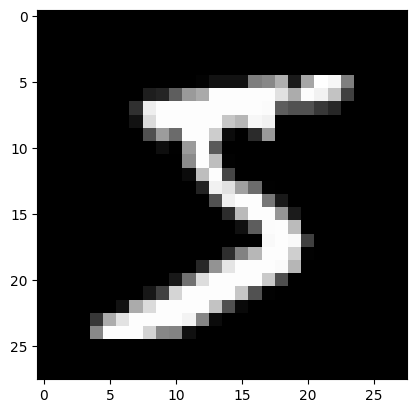

In [17]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0] , cmap='gray')

plt.show()

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
y_test.shape

(10000,)

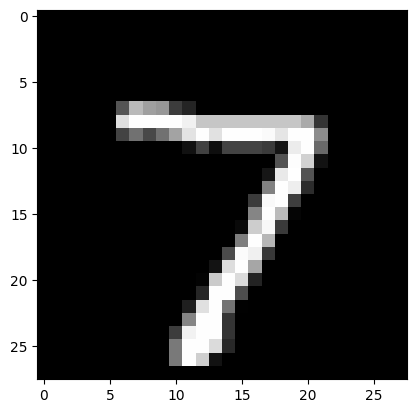

In [22]:
plt.imshow(x_test[0] , cmap='gray')

plt.show()

## 1.1.Displaying first 9 images from train data

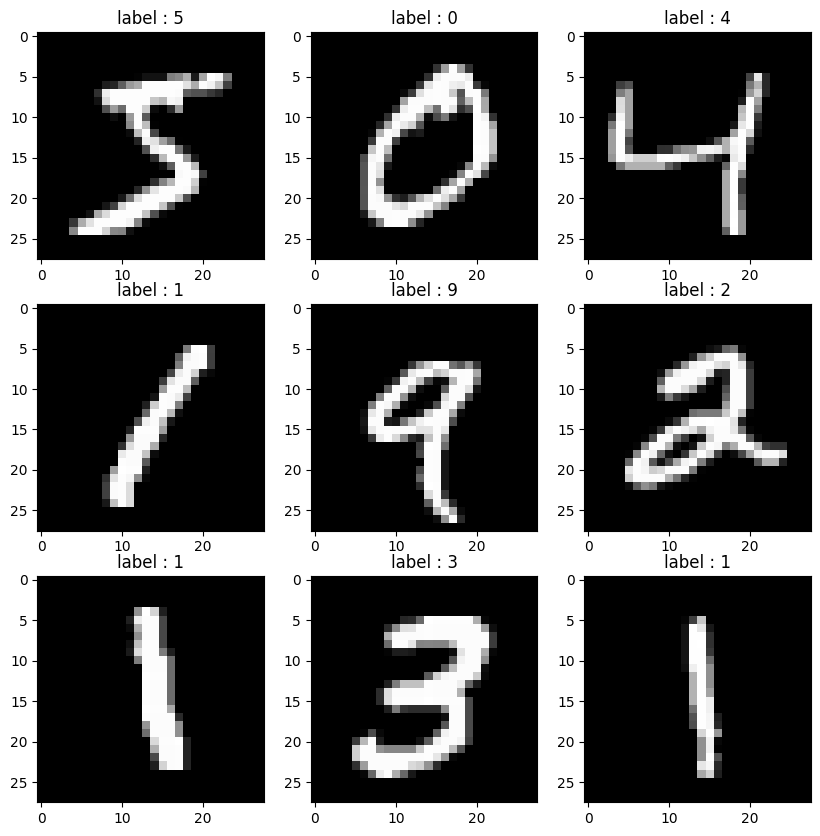

In [30]:
plt.figure(figsize =(10,10))
for i in range(9):
  plt.subplot(3 , 3 , i+1)
  plt.imshow(x_train[i] , cmap='gray')
  plt.title(f"label : {y_train[i]}")

In [31]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [34]:
# This is a multiclass classification problem
len(np.unique(y_train))

10

# 2.Preprocess image data
Pixel value 0-255


In [36]:
xtrain_scl = x_train.astype('float32')/255
xtest_scl = x_test.astype('float32')/255

In [38]:
xtrain_scl[0:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [39]:
xtrain_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# 3.One hot encode the y(Target) features

In [41]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(y_train)
ytest_cat = to_categorical(y_test)

In [44]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [46]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

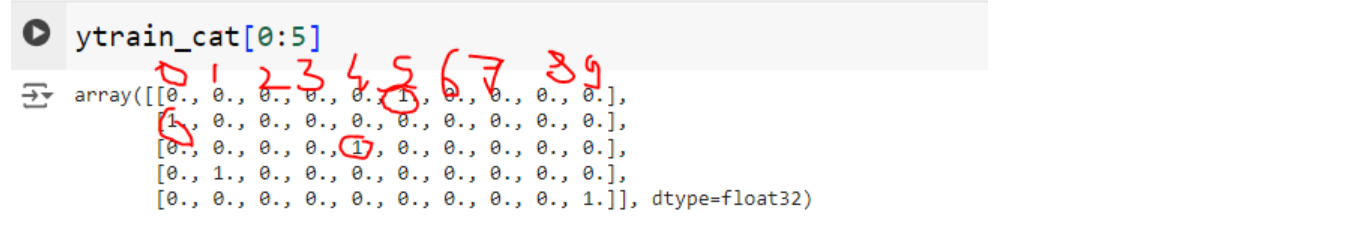

In [45]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [47]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# 4.Build the neural network
Simple Covnet architecture

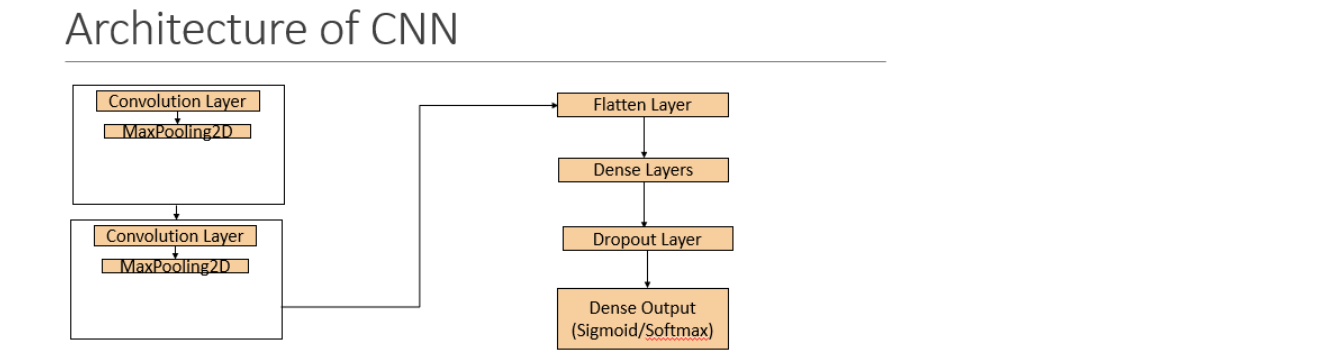

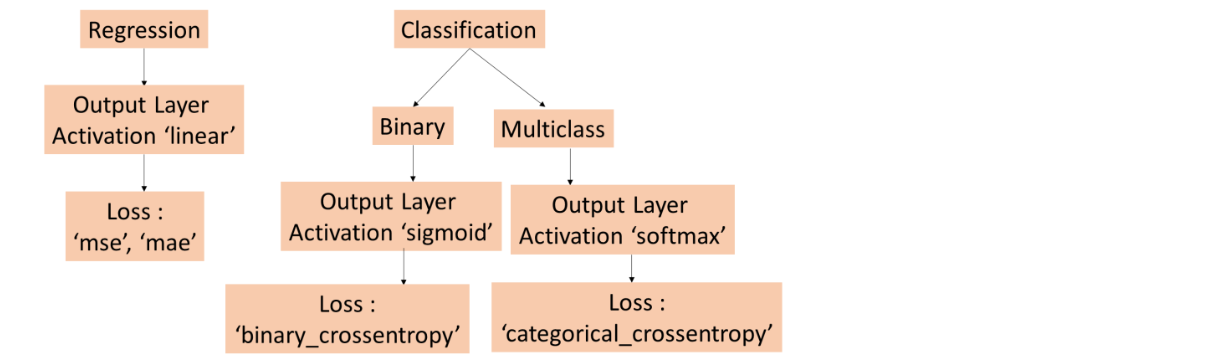

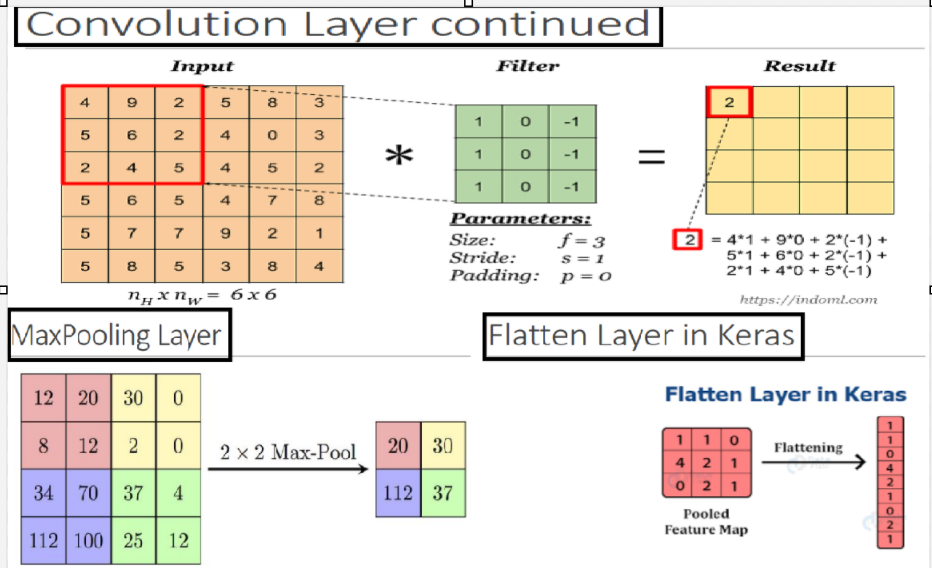

In [61]:
from keras.models import Sequential
from keras.layers import Input , Conv2D , MaxPooling2D , Flatten , Dense , Dropout

In [62]:
x_train.shape

(60000, 28, 28)

In [63]:
model = Sequential()

# Added Input Layer
model.add(Input(shape=(28 , 28 , 1)))

# Add Convolution Layer 1
model.add(Conv2D(filters=32 , kernel_size=(3,3) , activation='relu'))

# Add Max Pooling 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Convolution Layer 2
model.add(Conv2D(filters=64 , kernel_size=(3,3) , activation ='relu'))

# Add Max Pooling Layer 2
model.add(MaxPooling2D (pool_size=(2,2)))

# Add Flatten Layer
model.add(Flatten())

# Add Dropout Layer
model.add(Dropout(0.5))

# Output Layer]
model.add(Dense(ytrain_cat.shape[1] , activation='softmax'))

In [64]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [66]:
hist = model.fit(xtrain_scl , ytrain_cat , epochs=15 , validation_split=0.1)

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8521 - loss: 0.4764 - val_accuracy: 0.9843 - val_loss: 0.0559
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9722 - loss: 0.0883 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9790 - loss: 0.0677 - val_accuracy: 0.9907 - val_loss: 0.0376
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9822 - loss: 0.0561 - val_accuracy: 0.9900 - val_loss: 0.0323
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9855 - loss: 0.0474 - val_accuracy: 0.9910 - val_loss: 0.0341
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0453 - val_accuracy: 0.9910 - val_loss: 0.0316
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0415 - val_accuracy: 0.9918 - val_loss: 0.0295
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0362 -

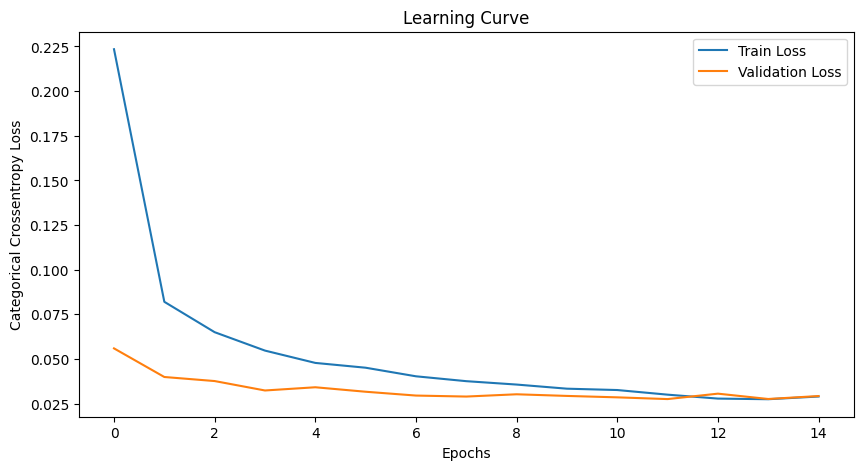

In [72]:
# Plot the learning curve

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'] , label='Train Loss')
plt.plot(hist.history['val_loss'] , label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.legend()
plt.show()

# 5.Evaluate the model in train and test

In [73]:
model.evaluate(xtrain_scl , ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9973 - loss: 0.0092


[0.011456197127699852, 0.9966333508491516]

In [74]:
model.evaluate(xtest_scl , ytest_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9910 - loss: 0.0261


[0.0221299696713686, 0.9930999875068665]

# 6.Predict results for train and test

In [75]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [78]:
yprob_train[0:5]

array([[4.8986453e-12, 3.6832187e-12, 2.9223959e-10, 4.7096773e-04,
        7.9305418e-14, 9.9951398e-01, 8.6399610e-13, 3.4377148e-10,
        9.0302245e-07, 1.4004004e-05],
       [9.9999321e-01, 1.3848047e-14, 2.0461523e-06, 7.8678184e-12,
        5.6833246e-11, 5.4414057e-11, 3.3225383e-06, 3.0513713e-13,
        5.1175186e-07, 9.5775101e-07],
       [3.5456308e-14, 6.8358935e-07, 3.3577916e-08, 2.1110437e-10,
        9.9995327e-01, 5.3707240e-11, 3.7373601e-11, 3.7777863e-05,
        1.8942876e-07, 7.9977817e-06],
       [1.9456355e-08, 9.9995661e-01, 5.0089789e-06, 2.1162029e-10,
        1.6757964e-05, 5.0808882e-09, 2.6803716e-06, 1.4412692e-05,
        4.3578652e-06, 6.0755461e-08],
       [2.6535406e-11, 2.4732620e-12, 3.0420164e-10, 5.0594062e-09,
        2.3027362e-05, 1.5013065e-11, 2.7995996e-14, 1.0330870e-06,
        7.1526338e-05, 9.9990439e-01]], dtype=float32)

In [77]:
yprob_test[0:5]

array([[1.6685184e-09, 1.5721631e-11, 6.7606135e-07, 1.1937603e-06,
        6.3953763e-13, 5.9604585e-11, 1.1799434e-16, 9.9999678e-01,
        5.4918967e-09, 1.2902555e-06],
       [1.9765514e-07, 1.1241459e-07, 9.9999595e-01, 4.0657019e-10,
        1.0873193e-11, 5.5162517e-15, 3.7460577e-06, 6.0010232e-13,
        2.4392316e-08, 9.8777479e-12],
       [4.4323322e-08, 9.9984753e-01, 1.7044072e-06, 1.6275933e-08,
        8.4133469e-05, 1.2475745e-07, 1.0117939e-05, 5.3960975e-05,
        1.8531325e-06, 4.7350352e-07],
       [9.9975806e-01, 3.2243885e-13, 7.5108951e-06, 4.8646580e-09,
        7.6061486e-09, 1.0943644e-08, 2.1481287e-04, 1.0050648e-09,
        1.9275526e-06, 1.7783230e-05],
       [2.1021780e-10, 4.1091774e-12, 2.6562887e-09, 1.0835910e-11,
        9.9999428e-01, 1.0372481e-12, 7.0474946e-09, 1.2761595e-10,
        7.4993054e-08, 5.5535706e-06]], dtype=float32)

In [79]:
import numpy as np
ypred_train = np.argmax(yprob_train , axis=1)
ypred_test = np.argmax(yprob_test , axis=1)

In [80]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [81]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [82]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [83]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# 7.Plot the confusion Matrix

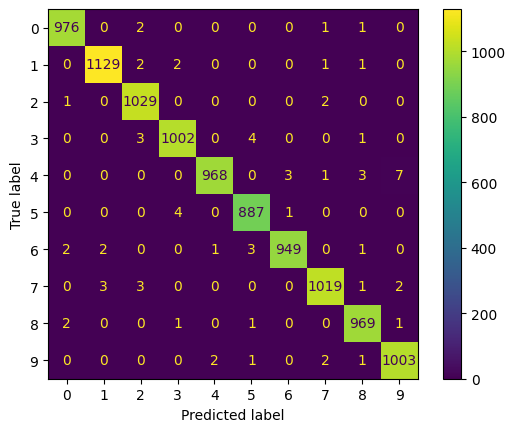

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)

# 7.1.classification Report

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test , ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# 8.Save above model for future use

In [89]:
model.save('Handwritten Digit Classificationr.keras')

# 8.1.Load above model

In [94]:
from keras.models import load_model
nn = load_model('/content/Handwritten Digit Classificationr.keras')
nn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

In [104]:
# Loading the image
import cv2
img1 = cv2.imread('/content/S6.img1.jpeg', cv2.IMREAD_GRAYSCALE)
img1

array([[  1,   1,   0,   1,   0,   0,   2,   0,   2,   0,   0,   2,   0,
          0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   2,   0,   1,   0,   3,   3,   0,   0,
          0,   0,   0,   0,   4,   0,   2,   2,   0,   1,   0,   0,   0,
          0,   0],
       [  1,   2,   1,   1,   0,   0,   4,   0,   0,   0,   0,   0,   2,
          0,   0,   5,   2,   0,   0,   0,   0,   5,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   2,   2,   0,   2,   0,   1,   1,   0,   0,
          1,   0,   0,   0,   6,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   1,   5,   0,  75, 224, 253, 254, 255, 252, 253, 255, 255,
        255, 255, 253, 254, 220, 105,   0,   4,   0,   0,   2,   0,   0,
          0,   0],
       [  2,   0,   0,   3, 221, 253, 255, 255, 255, 255, 255, 255, 253,
        254, 255, 255, 254, 255, 255, 255, 216, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 123, 253, 255, 254, 254, 255, 253, 253, 255,
        255, 252, 253, 255, 255, 255, 254, 255, 254,   0,   1,   0,   0,
          0,   0],
       [  0,   2,   2,   0,   3,   1,   0,   2,   1,   1,   0,   2,   0,
          3,  96, 224, 254, 255, 254, 255, 254, 171,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   2,   0,   0,   0,   0,   0,   0,   1,   0,   0,  95,
        223, 255, 253, 252, 255, 253, 255, 166,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   2,   0,   0, 132, 253,
        253, 255, 255, 255, 255, 165,   8,   4,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0,   0,  71, 222, 255, 248, 255,
        255, 253, 169,   8,   0,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   3,   1,   0,   3,   3,  69, 237, 255, 255, 254, 254,
        255, 224,  94,   2,   2,   0,   0,   2,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   1,   0,   1,   1,   0,   0, 225, 254, 251, 255, 253, 255,
        255, 249, 255, 219,  96,   2,   0,   1,   0,   2,   0,   0,   0,
          0,   0],
       [  1,   0,   1,   0,   0,   2,   0, 120, 255, 254, 254, 253, 252,
        255, 255, 254, 255, 243, 103,   0,   0,   5,   0,   3,   0,   0,
          0,   0],
       [  0,   1,   0,   0,   2,   0,   1,   0,   1,   1,   0,   5,   3,
        118, 255, 253, 250, 255, 255, 221,  95,   0,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,   1,   0,   1,   0,   0,   3,   0,   3,
          0,   0, 121, 255, 255, 252, 255, 248,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   4,   0,   0,   1,   0,   1,   1,   1,   0,   0,   0,
          2,   0,   1,  10, 155, 255, 255, 250,   3,   1,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   2,   0,   1,   0,   0,   0,   2,   2,   0,
          0,   0,   0,   0,   2, 255, 254, 255,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   3,   2,   0,   1,   2,   3,   0,   1,   0,   0,   1,   0,
          0,   3,   2,   2,   0, 254, 255, 254,   2,   2,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   6,   0,   0,   0,   1,   0,   2,   0,   2,   0,
          3,   0,   0,   0,   1, 254, 255, 252,   3,   0,   2,   0,   0,
          0,   0],
       [  4,   0,   2,   0,   0,   3,  75, 221, 223,  96,   0,   2,   0,
          0,   0,   6,   0, 125, 254, 255, 255,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   5,   1,   0,   0,   1, 216, 255, 255, 243,  98,   0,   2,
          2,   0,  72, 224, 255, 255, 255, 166,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   5,   2,   1, 126, 253, 255, 254, 255, 255, 255,
        255, 255, 255, 255, 255, 253, 183,   9,   1,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   3,   0,   2,   0,   3, 120, 255, 253, 255, 254, 254,
        253, 255, 253, 254, 255, 167,   8,   2,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [105]:
img1_scl = img1.astype('float32')/255

In [106]:
probs = model.predict(np.array([img1_scl]))

probs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


array([[2.3216962e-18, 8.0713343e-19, 4.6055074e-12, 9.9999917e-01,
        8.9862772e-19, 8.5972209e-07, 3.4397894e-18, 2.7664827e-16,
        1.8290204e-10, 2.0416956e-11]], dtype=float32)

In [107]:
preds = np.argmax(probs)

preds

3

In [109]:
prob = np.max(probs)
prob


0.99999917

In [119]:
def predict_number(path):
  img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img1, cmap='gray')
  plt.show()
  img1_scl = img1.astype('float32')/255
  probs = model.predict(np.array([img1_scl]))
  preds = np.argmax(probs)
  prob = np.max(probs)
  return preds, prob

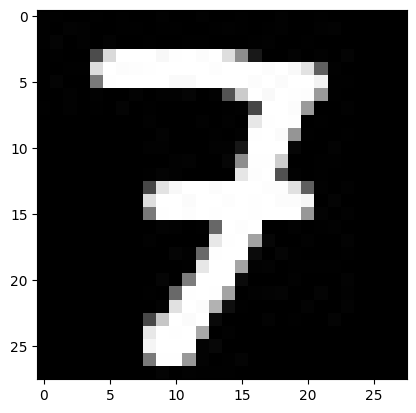

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


(7, 0.7494809)

In [120]:
predict_number('/content/S6.img2.jpeg')

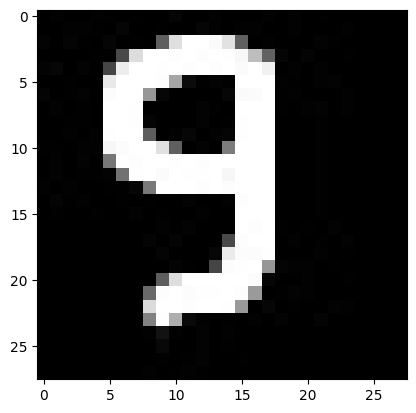

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


(4, 0.7603395)

In [121]:
predict_number('/content/S6.img3.jpeg')